In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
from PIL import Image
import os

In [ ]:
class BurmeseCharacterRecognizer:
    def __init__(self):
        # Initialize the neural network model
        self.model = self._build_model()

    def _build_model(self):
        """Build the neural network architecture"""
        model = models.Sequential([
            layers.Dense(300, activation='relu', input_shape=(36,)),
            layers.Dropout(0.2),
            layers.Dense(len(self.classes), activation='softmax')
        ])

        model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
        return model

    def preprocess_image(self, img_path):
        """Preprocess the input image"""
        # Load and resize image
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        img = img.resize((150, 140))  # Optimal size found in research

        # Apply Sobel edge detection
        img_array = np.array(img)
        sobel_x = cv2.Sobel(img_array, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(img_array, cv2.CV_64F, 0, 1, ksize=3)

        # Calculate gradient magnitude and direction
        grad_mag = np.sqrt(sobel_x**2 + sobel_y**2)
        grad_dir = np.arctan2(sobel_y, sobel_x)

        # Create histogram of directions (36 bins = 5 degree intervals)
        hist = np.histogram(grad_dir, bins=36, range=(-np.pi, np.pi),
                          weights=grad_mag)[0]
        hist = hist / np.sum(hist)  # Normalize

        return hist

    def train(self, train_dir, epochs=50):
        """Train the model"""
        # Prepare training data
        X_train = []
        y_train = []

        classes = os.listdir(train_dir)
        self.classes = {cls: i for i, cls in enumerate(classes)}

        for label, cls in enumerate(classes):
            class_dir = os.path.join(train_dir, cls)
            for img_path in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_path)
                features = self.preprocess_image(img_path)
                X_train.append(features)
                y_train.append(label)

        # Convert to numpy arrays
        X_train = np.array(X_train)
        y_train = np.array(y_train)

        # Train the model
        history = self.model.fit(
            X_train, y_train,
            epochs=epochs,
            validation_split=0.2
        )
        return history

    def predict(self, img_path):
        """Make prediction for a single image"""
        features = self.preprocess_image(img_path)
        features = features.reshape(1, -1)
        pred = self.model.predict(features)
        return self.classes[list(self.classes.keys())[np.argmax(pred[0])]]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!apt-get install unrar
!pip install rarfile


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:
import os
import zipfile
import rarfile

archive_path = "/content/Burmese.zip"

output_dir = "/content/extracted_files"
os.makedirs(output_dir, exist_ok=True)

if archive_path.endswith(".zip"):
    with zipfile.ZipFile(archive_path, 'r') as archive:
        archive.extractall(output_dir)
    print("✅ ZIP file extracted successfully")

elif archive_path.endswith(".rar"):
    rarfile.UNRAR_TOOL = "/usr/bin/unrar"
    with rarfile.RarFile(archive_path) as archive:
        archive.extractall(output_dir)
    print("✅ RAR file extracted successfully")

else:
    print("❌ Unsupported file format. Use .zip or .rar")


✅ ZIP file extracted successfully


In [ ]:
import os
from collections import Counter

extracted_dir = "/content/extracted_files"

total_files = 0
file_extensions = Counter()

print("📂 Folder Structure:\n")

for root, dirs, files in os.walk(extracted_dir):
    level = root.replace(extracted_dir, "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}📁 {os.path.basename(root)}/")

    subindent = " " * 4 * (level + 1)
    for f in files[:5]:  # show only first 5 files per folder
        print(f"{subindent}📄 {f}")

    total_files += len(files)
    for f in files:
        ext = os.path.splitext(f)[1].lower()
        file_extensions[ext] += 1

print("\n📊 Dataset Summary")
print(f"✅ Total files: {total_files}")
print("✅ File types and counts:")

for ext, count in file_extensions.items():
    print(f"   {ext if ext else '[no extension]'} : {count}")


📂 Folder Structure:

📁 extracted_files/
    📁 BurmeseCharacterDataSets/
        📄 nya_kyi.rar
        📄 ta_thun_lyin_chate.rar
        📄 Aha.rar
        📄 7.rar
        📄 nga.rar

📊 Dataset Summary
✅ Total files: 54
✅ File types and counts:
   .rar : 54


In [ ]:
!pip install patool
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:
import os
import patoolib
import shutil

source_dir = 'extracted_files/BurmeseCharacterDataSets/'
target_dir = 'dataset_organized/'

if not os.path.exists(target_dir):
    os.makedirs(target_dir)

for file in os.listdir(source_dir):
    if file.endswith(".rar"):
        folder_name = file.replace(".rar", "")
        extract_path = os.path.join(target_dir, folder_name)

        if not os.path.exists(extract_path):
            os.makedirs(extract_path)

        try:
            patoolib.extract_archive(os.path.join(source_dir, file), outdir=extract_path)
        except Exception as e:
            print(f"Error extracting {file}: {e}")

print("Extraction Complete.")

INFO patool: Extracting extracted_files/BurmeseCharacterDataSets/nya_kyi.rar ...
INFO:patool:Extracting extracted_files/BurmeseCharacterDataSets/nya_kyi.rar ...
INFO patool: running /usr/bin/unrar x -kb -or -- /content/extracted_files/BurmeseCharacterDataSets/nya_kyi.rar
INFO:patool:running /usr/bin/unrar x -kb -or -- /content/extracted_files/BurmeseCharacterDataSets/nya_kyi.rar
INFO patool: ... extracted_files/BurmeseCharacterDataSets/nya_kyi.rar extracted to `dataset_organized/nya_kyi'.
INFO:patool:... extracted_files/BurmeseCharacterDataSets/nya_kyi.rar extracted to `dataset_organized/nya_kyi'.
INFO patool: Extracting extracted_files/BurmeseCharacterDataSets/ta_thun_lyin_chate.rar ...
INFO:patool:Extracting extracted_files/BurmeseCharacterDataSets/ta_thun_lyin_chate.rar ...
INFO patool: running /usr/bin/unrar x -kb -or -- /content/extracted_files/BurmeseCharacterDataSets/ta_thun_lyin_chate.rar
INFO:patool:running /usr/bin/unrar x -kb -or -- /content/extracted_files/BurmeseCharacterD

Extraction Complete.


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- 1. CONFIGURATION ---
target_dir = 'dataset_organized/'
img_size = (64, 64)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=8,       # Reduced to keep character integrity
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

train_gen = datagen.flow_from_directory(
    target_dir, target_size=img_size, batch_size=batch_size,
    color_mode='rgb', class_mode='categorical', subset='training'
)

val_gen = datagen.flow_from_directory(
    target_dir, target_size=img_size, batch_size=batch_size,
    color_mode='rgb', class_mode='categorical', subset='validation'
)

# --- 2. ADVANCED RESIDUAL BLOCK ---
def residual_block(x, filters, stride=1):
    shortcut = x
    # First Conv
    x = layers.Conv2D(filters, (3, 3), strides=stride, padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x) # Swish often outperforms ReLU in deep OCR
    # Second Conv
    x = layers.Conv2D(filters, (3, 3), strides=1, padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)

    # Adjust shortcut if dimensions changed
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, (1, 1), strides=stride, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.Activation('swish')(x)
    return x

# --- 3. THE "90% PLUS" ARCHITECTURE ---
inputs = layers.Input(shape=(64, 64, 3))

# Initial Stem
x = layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('swish')(x)

# Feature Stages
x = residual_block(x, 64)
x = layers.MaxPooling2D(2)(x)

x = residual_block(x, 128)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.MaxPooling2D(2)(x)

x = residual_block(x, 256)
x = residual_block(x, 256) # Stacked for more complexity
x = layers.MaxPooling2D(2)(x)

x = residual_block(x, 512)

# Head
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='swish')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(train_gen.num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)

# --- 4. OPTIMIZED TRAINING ---
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint('burmese_90plus.keras', save_best_only=True, monitor='val_accuracy'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-7),
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
]

# --- 5. EXECUTION ---
history = model.fit(
    train_gen,
    epochs=100,
    validation_data=val_gen,
    callbacks=callbacks
)

Found 9605 images belonging to 54 classes.
Found 2373 images belonging to 54 classes.
Epoch 1/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 68s 149ms/step - accuracy: 0.0567 - loss: 3.8046 - val_accuracy: 0.0582 - val_loss: 4.0093 - learning_rate: 1.0000e-04
Epoch 2/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 31s 102ms/step - accuracy: 0.2825 - loss: 2.7808 - val_accuracy: 0.3784 - val_loss: 2.4219 - learning_rate: 1.0000e-04
Epoch 3/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 31s 104ms/step - accuracy: 0.6309 - loss: 1.8546 - val_accuracy: 0.6566 - val_loss: 1.7879 - learning_rate: 1.0000e-04
Epoch 4/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 33s 110ms/step - accuracy: 0.7694 - loss: 1.4821 - val_accuracy: 0.7733 - val_loss: 1.4385 - learning_rate: 1.0000e-04
Epoch 5/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 31s 104ms/step - accuracy: 0.8463 - loss: 1.2904 - val_accuracy: 0.8479 - val_loss: 1.2337 - learning_rate: 1.0000e-04
Epoch 6/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 31s 103ms/step - accuracy: 0.8835 - loss: 1.1828 - val_accuracy: 0.8078 -

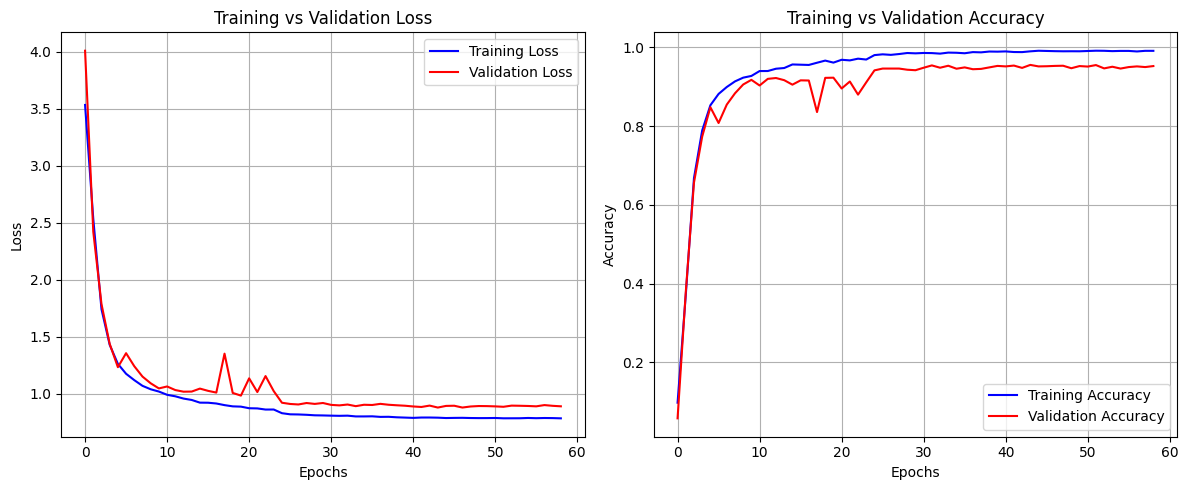

In [ ]:
import matplotlib.pyplot as plt

# 1. Plot Training & Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 2. Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Saving ka.png to ka.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


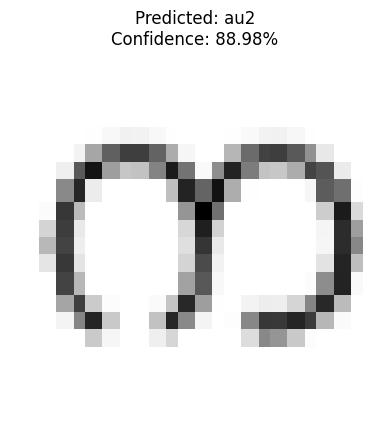

File: ka.png | Result: au2 (88.98%)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt

# 1. Load the model and set up labels
model = tf.keras.models.load_model('burmese_90plus.keras')
class_labels = {v: k for k, v in train_gen.class_indices.items()}

# 2. Upload and Predict
uploaded = files.upload()

for filename in uploaded.keys():
    # Preprocess the image
    img = image.load_img(filename, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Run Prediction
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions[0])
    confidence = 100 * np.max(predictions[0])
    predicted_name = class_labels[class_idx]

    # Visualize result
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_name}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()

    print(f"File: {filename} | Result: {predicted_name} ({confidence:.2f}%)")